In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
import uq4pk_src as uq4pk

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
ssps = uq4pk.model_grids.MilesSSP(lmd_min=5000, lmd_max=5500)

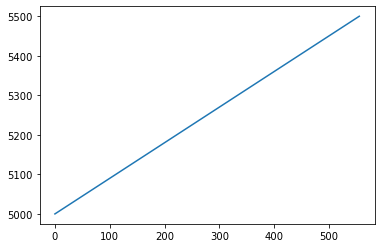

In [3]:
plt.plot(ssps.lmd)

In [4]:
ssps.X.shape

(556, 636)

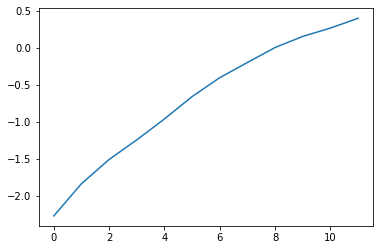

In [6]:
plt.plot(ssps.par_cents[0])

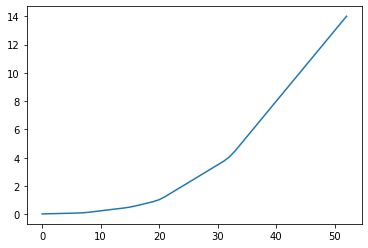

In [7]:
plt.plot(ssps.par_cents[1])

In [118]:
dlmd = ssps.lmd[1]-ssps.lmd[0]

In [119]:
integrated_fluxes = np.sum(ssps.X*dlmd, 0)

In [120]:
plotter = uq4pk.plotting.Plotter(ssps=ssps)

In [218]:
zsl = slice(2,None,4)
tsl = slice(8,None,18)

XXX = ssps.reshape_beta(ssps.X)
XXX = XXX[:, zsl, tsl]
assert XXX.shape[1:] == (3,3)

In [219]:
z0 = ssps.par_cents[0][zsl]
x = np.linspace(0, 1, ssps.par_cents[0].size+1)
x = (x[:-1] + x[1:])/2.
z0 = np.interp(z0, ssps.par_cents[0], x)

t0 = ssps.par_cents[1][tsl]
x = np.linspace(0, 1, ssps.par_cents[1].size+1)
x = (x[:-1] + x[1:])/2.
t0 = np.interp(t0, ssps.par_cents[1], x)

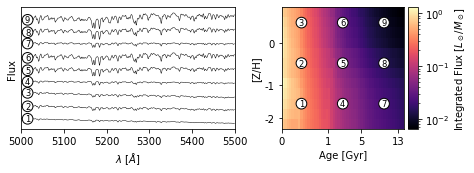

In [237]:
fig = plt.figure(figsize=(6.7,2.5))
gspec = fig.add_gridspec(ncols=5, nrows=1)
axs = fig.add_subplot(gspec[0:3])
ax = fig.add_subplot(gspec[3:])

count = 1
for j in range(3):
    for i in range(3):
        spec = XXX[:,i,j]/np.sum(XXX[:,i,j])
        spec = spec+0.001*i+0.003*j
        axs.plot(ssps.lmd, spec, '-k', lw=0.5)
        axs.text(5015, spec[0], str(count),
                 va='center', ha='center', size='small',
                 bbox = dict(boxstyle='circle,pad=0.1', fc='w'))
        count += 1
axs.set_yticks([])
axs.set_xlim([5000, 5500])
axs.set_xlabel('$\lambda$ [$\AA$]')
axs.set_ylabel('Flux')

img = ssps.reshape_beta(integrated_fluxes)
img = ax.imshow(img, **plotter.kw_post2d_plot, norm=LogNorm())

count = 1
for j in range(3):
    for i in range(3):
        z00 = z0[i]
        t00 = t0[j]
        ax.text(t00, z00,
                str(count), va='center', ha='center',
                size='small',
                bbox = dict(boxstyle='circle,pad=0.1', fc='w'))
        count += 1

ax.set_xlabel(ssps.par_pltsym[1])
ax.set_ylabel(ssps.par_pltsym[0])
ax.set_xticks(ssps.img_t_ticks)
ax.set_xticklabels(ssps.t_ticks)
ax.set_yticks(ssps.img_z_ticks)
ax.set_yticklabels(ssps.z_ticks)

fig.tight_layout()
fig.subplots_adjust(right=0.85)

pos = ax.get_position()
cpos = [pos.x1+0.01, pos.y0, 0.02, pos.height]
cax = fig.add_axes(cpos)
cbar = plt.colorbar(img, cax=cax)
cbar.set_label('Integrated Flux [$L_\odot/M_\odot$]')

fig.savefig('paper_plots/ssp_templates.png', dpi=300)